In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
%matplotlib inline

In [2]:
df = pd.read_csv('../io/HR_comma_sep.xls')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
cut = df[['left','salary']].copy()

In [4]:
encoder = OrdinalEncoder()
cut['ordinal_sal'] = encoder.fit_transform(cut[['salary']])

In [5]:
cut.drop(columns=['salary'],inplace=True)

In [6]:
# computes a frequency table of the factors
ct = pd.crosstab(cut['ordinal_sal'],cut.left)

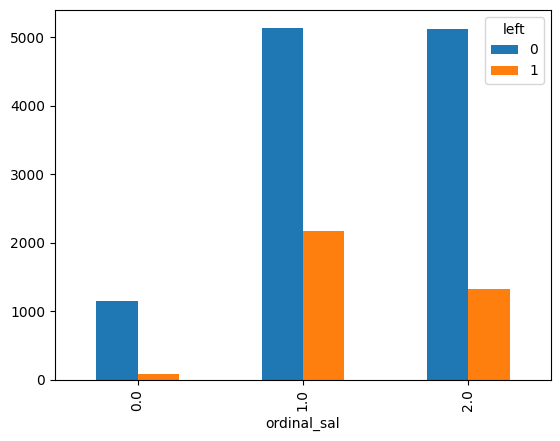

In [7]:
ct.plot.bar();

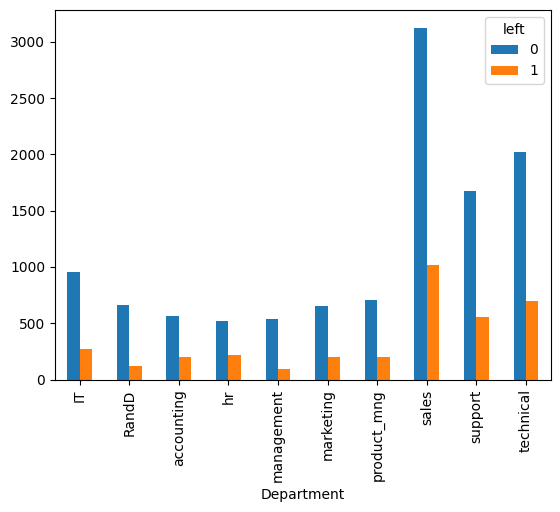

In [8]:
pd.crosstab(df.Department, df.left).plot.bar();

In [9]:
subdf = df[['satisfaction_level','average_montly_hours','salary','promotion_last_5years']]
subdf.head()

,satisfaction_level,average_montly_hours,salary,promotion_last_5years
0,0.38,157,low,0
1,0.80,262,medium,0
2,0.11,272,medium,0
3,0.72,223,low,0
4,0.37,159,low,0


In [23]:
col = ColumnTransformer([('onehotencode', OneHotEncoder(),[2])], remainder='passthrough')
subdf=pd.DataFrame(col.fit_transform(subdf),columns=['salary_high','salary_low','salary_medium','satisfaction_level','average_monthly_hours','promotion_last_5years'])

for x in range(0,3):
    subdf[subdf.columns[x]] = subdf[subdf.columns[x]].astype('int32')

In [ ]:
y = df.left

In [26]:
X_train, X_test, y_train, y_test = train_test_split(subdf,y,test_size=0.7)

In [27]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [30]:
model.score(X_test,y_test)

0.7745714285714286